# Construindo um Modelo de Regressão Linear com TensorFlow

Use como referência o Deep Learning Book: http://www.deeplearningbook.com.br/


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

### Definindo os hyperparâmetros do modelo

In [2]:
# Hyperparâmetros do modelo
learning_rate = 0.01
training_epochs = 2000
display_step = 200

### Definindo os datasets de treino e de teste

Considere X como o tamanho de uma casa e y o preço de uma casa¶


In [3]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

### Placeholders e variáveis

In [4]:
# Placeholders para as variáveis preditoras (x) e para  variável target (y)
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# Pesos e bias do modelo
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

### Construindo o modelo

In [5]:
# Construindo o modelo linear
# Fórmula do modelo linear: y = W*X + b
linear_model = W*X + b
 
# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Executando o grafo computacional, treinando e testando o modelo

Epoch:   200 	 Cost:    0.1098 	 W:0.3545 	 b:0.06985
Epoch:   400 	 Cost:   0.09716 	 W:0.3323 	 b:0.2271
Epoch:   600 	 Cost:   0.08938 	 W:0.3149 	 b:0.3504
Epoch:   800 	 Cost:   0.08459 	 W:0.3012 	 b:0.4471
Epoch:  1000 	 Cost:   0.08164 	 W:0.2905 	 b:0.5229
Epoch:  1200 	 Cost:   0.07983 	 W:0.2822 	 b:0.5824
Epoch:  1400 	 Cost:   0.07871 	 W:0.2756 	 b:0.6291
Epoch:  1600 	 Cost:   0.07803 	 W:0.2704 	 b:0.6657
Epoch:  1800 	 Cost:    0.0776 	 W:0.2664 	 b:0.6944
Epoch:  2000 	 Cost:   0.07734 	 W:0.2632 	 b:0.7169

Otimização Concluída!
Custo Final de Treinamento: 0.07734394  - W Final: 0.26318583  - b Final: 0.71691054 



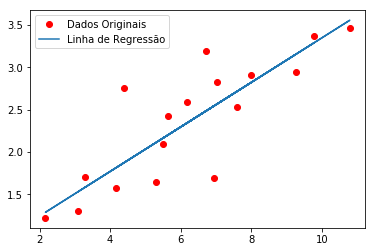

Custo Final em Teste: 0.07640207
Diferença Média Quadrada Absoluta: 0.0009418726


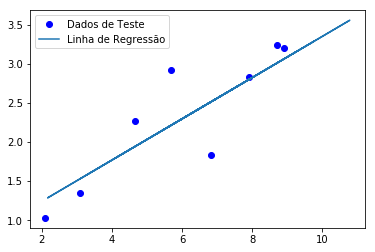

In [6]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()
 
# Iniciando a sessão
with tf.Session() as sess:
    
    # Iniciando as variáveis
    sess.run(init)
 
    # Treinamento do modelo
    for epoch in range(training_epochs):
 
        # Otimização com Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
         
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(W), sess.run(b)))
             
    # Imprimindo os parâmetros finais do modelo
    print("\nOtimização Concluída!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Custo Final de Treinamento:", training_cost, " - W Final:", sess.run(W), " - b Final:", sess.run(b), '\n')
     
    # Visualizando o resultado
    plt.plot(train_X, train_y, 'ro', label='Dados Originais')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
 
    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y})
     
    print("Custo Final em Teste:", testing_cost)
    print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
 
    # Display em Teste
    plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
sess.close()